In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
chrome_options = Options()
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'
chrome_options.add_argument(f'user-agent={user_agent}')
chrome_options.add_argument("--headless")
wd = webdriver.Chrome(ChromeDriverManager().install(), options=chrome_options)

/var/folders/l_/b5wczsf55z9dmf_dzr3vw6ph0000gr/T/ipykernel_96501/2385318896.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome(ChromeDriverManager().install(), options=chrome_options)


In [3]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [4]:
wd

<selenium.webdriver.chrome.webdriver.WebDriver (session="d0a3669137b0e156405b755a4cd520b1")>

In [5]:
wd.get('https://twitter.com/nayibbukele/status/1647691511151177728')

In [6]:
all_tweets = wd.find_elements(By.XPATH, './/div[@data-testid="tweetText"]')

In [7]:
tweets = []
result = False
old_height = wd.execute_script("return document.body.scrollHeight")

In [10]:
all_tweets = wd.find_elements(By.XPATH, '//div[@data-testid]//article[@data-testid="tweet"]')

In [9]:
test = all_tweets[1].get_attribute('outerHTML')
soup = BeautifulSoup(test)
[s['alt'] for s in soup.find_all('img')]
#[a['href'] for a in soup.find_all('a')][0], soup.time['datetime']

IndexError: list index out of range

In [11]:
# from https://stackoverflow.com/questions/72599235/scrape-tweet-replies-with-python-and-selenium/72783642
import time
while result == False:

    for item in all_tweets[1:]: # skip tweet already scrapped
        soup = BeautifulSoup(item.get_attribute('outerHTML'))

        print('--- date ---')
        try:
            date = soup.time['datetime']
        except:
            date = '[empty]'
        print(date)

        print('--- text ---')
        try:
            text = item.find_element(By.XPATH, './/div[@data-testid="tweetText"]').text
            if len(soup.find_all('img')) > 1:
                for e in soup.find_all('img')[1:]:
                    text += e['alt']
        except:
            text = '[empty]'
        print(text)

        print('--- acc ---')
        try:
            acc = [a['href'] for a in soup.find_all('a')][0]
        except:
            acc = '[empty]'
        print(acc)
    
        #Append new tweets replies to tweet array
        if date != '[empty]':
            tweets.append([date, acc, text])
    
    #scroll down the page
    wd.execute_script("window.scrollTo(0,document.body.scrollHeight)")

    time.sleep(2)

    new_height = wd.execute_script("return document.body.scrollHeight")

    if new_height == old_height:
        result = True
    old_height = new_height

    #update all_tweets to keep loop
    all_tweets = wd.find_elements(By.XPATH, '//div[@data-testid]//article[@data-testid="tweet"]')

--- date ---
2023-04-16T20:01:18.000Z
--- text ---
💪
--- acc ---
/CrisFloresSV
--- date ---
2023-04-16T20:01:19.000Z
--- text ---
Hard times create strong man, strong man create good times, good times create weak man, and weak man create hard times.
--- acc ---
/1Gayar
--- date ---
2023-04-16T20:05:23.000Z
--- text ---
As Humanity grows and learn, in the future this cycle will not be the norm 💪🏁
--- acc ---
/DppCrypto
--- date ---
[empty]
--- text ---
Protect your eyes from harmful blue light emitted by electronic devices with it!
Say goodbye to eye strain and discomfort and start enjoying clear and comfortable vision.

Get it https://tose.io/lightglasses-4?twclid=2-1xabyufaihwo4ccg4aekvj2tl👉
--- acc ---
/toseshopshop
--- date ---
2023-04-16T20:01:56.000Z
--- text ---
Es correcto...🎭👊🇸🇻
--- acc ---
/politicandoss
--- date ---
2023-04-16T20:02:00.000Z
--- text ---
Hasta la más oscura tiene su amanecer. El Salvador renace, en buen tiempo.🇸🇻
--- acc ---
/tuiterolobato
--- date ---
2023-04

In [36]:
import pandas as pd
tw = pd.DataFrame(tweets).rename(columns={0:'date', 1:'acc_name', 2:'text'})

In [55]:
tw['date'] = pd.to_datetime(tw['date'])
tw['date'].groupby(tw['date'].dt.day).count()#.plot(kind="bar")

date
16    249
17     13
18      3
Name: date, dtype: int64

(array([39.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.        ,   6.42857143,  12.85714286,  19.28571429,
         25.71428571,  32.14285714,  38.57142857,  45.        ,
         51.42857143,  57.85714286,  64.28571429,  70.71428571,
         77.14285714,  83.57142857,  90.        ,  96.42857143,
        102.85714286, 109.28571429, 115.71428571, 122.14285714,
        128.57142857, 135.        , 141.42857143, 147.85714286,
        154.28571429, 160.71428571, 167.14285714, 173.57142857,
        180.        , 186.42857143, 192.85714286, 199.28571429,
        205.71428571, 212.14285714, 218.57142857, 225.        ]),
 <BarContainer object of 35 artists>)

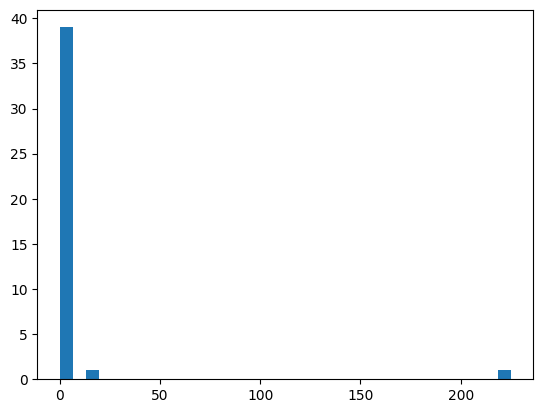

In [61]:
from matplotlib import pyplot as plt

plt.hist(tw.groupby(pd.Grouper(key='date', freq='H')).count()['text'], 35)#.plot(kind='bar')

In [62]:
tw

,date,acc_name,text
0,2023-04-16 20:01:18+00:00,/CrisFloresSV,💪
1,2023-04-16 20:01:19+00:00,/1Gayar,"Hard times create strong man, strong man creat..."
2,2023-04-16 20:05:23+00:00,/DppCrypto,"As Humanity grows and learn, in the future thi..."
3,2023-04-16 20:01:56+00:00,/politicandoss,Es correcto...🎭👊🇸🇻
4,2023-04-16 20:02:00+00:00,/tuiterolobato,Hasta la más oscura tiene su amanecer. El Salv...
...,...,...,...
260,2023-04-16 20:19:08+00:00,/Fernand16606441,Indiscutiblemente.
261,2023-04-16 20:20:27+00:00,/ConstantinP1,Interesante. Otra figura de la historia dijo e...
262,2023-04-16 20:22:36+00:00,/Carlosa80779752,of course yes president Bukele 🫡🫡🫡🫡🫡🤙🤙🤙🤙
263,2023-04-16 20:28:12+00:00,/CertifiedHodler,📌


In [76]:
import collections
from string import punctuation, digits

def whitespace_tokenize(text):
    return [x.lower() for x in re.split(r"([.,!?]+)?\s+", text) if x]

def count_words(df, relative=False):
    word_count = collections.defaultdict(int)
    
    tokenized_tweets = df['text'].apply(whitespace_tokenize).to_list()

    es_stops = open('spanish.txt').readlines()
    es_stops = [s.strip() for s in es_stops]
    en_stops = open('english.txt').readlines()
    en_stops = [s.strip() for s in en_stops]
    all_stops = [d for d in digits] + [p for p in punctuation] + es_stops + en_stops + ['rt', '\n', '\n\n', '…', '¡', '¿', '“', '”', '...', ' ', '', '🏼', '[empty]'] 

    for tweet in tokenized_tweets:
        for word in tweet:
            if (word.lower() not in all_stops) and (word != ''):
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1 
    
    freq = sorted(word_count.items(), key=lambda x:x[1], reverse=True)
    if relative:
        freq = [(f[0], f[1]/len(freq)) for f in freq]

    return freq

In [77]:
freq = count_words(tw, relative=True)

<Axes: ylabel='word'>

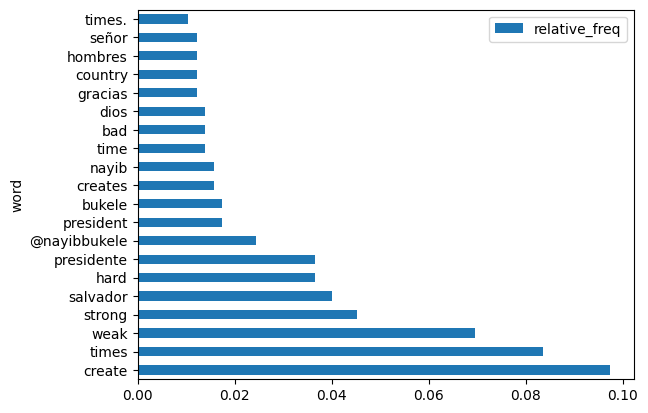

In [95]:
freq = pd.DataFrame(freq).rename(columns={0:'word', 1:'relative_freq'})
freq[:20].plot(x='word', y='relative_freq', kind='barh')

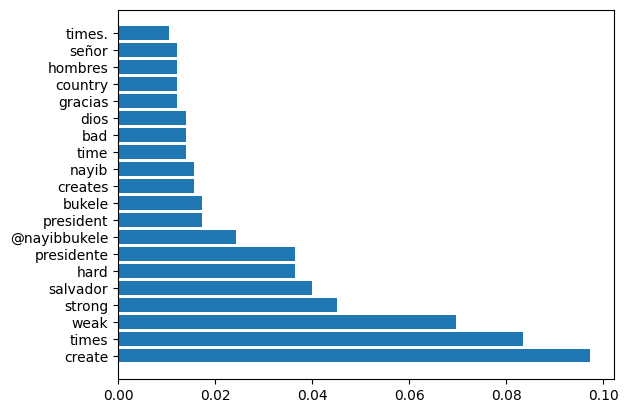

In [87]:
figure = plt.barh([f[0] for f in freq[:20]], [f[1] for f in freq[:20]])